In [1]:
# 필요한 package load
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

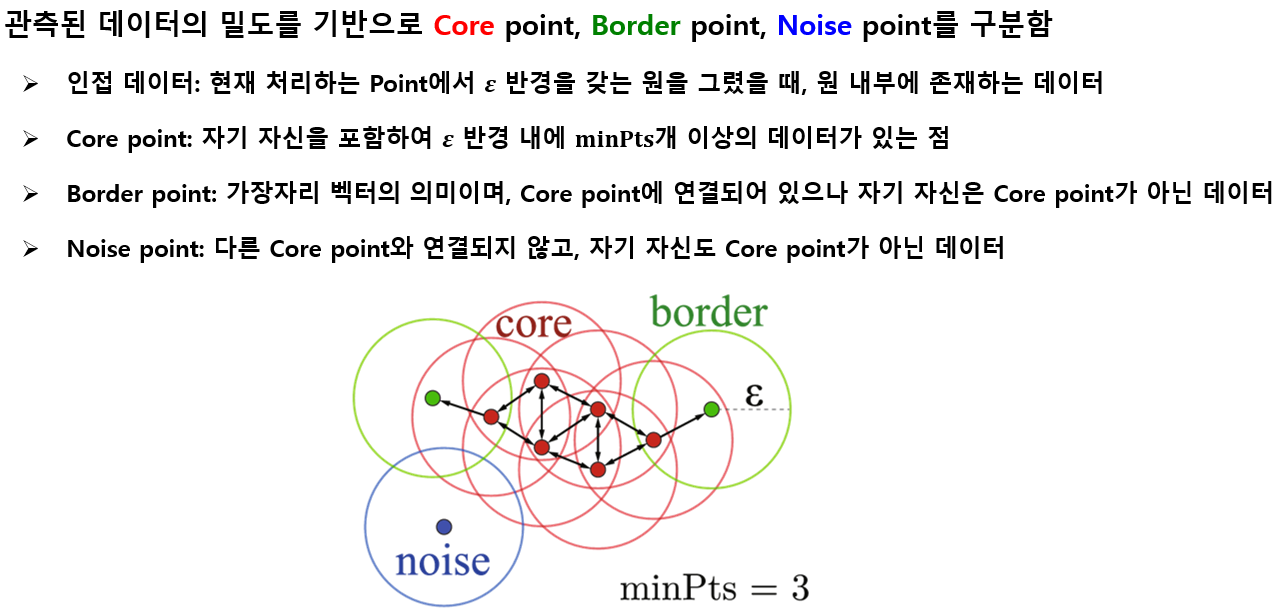

In [2]:
# Data load (make_moons dataset in sklearn)
X, y = make_moons(n_samples=500, noise=0.1)
df = pd.DataFrame(X,y)
df = df.rename(columns={0: "X1", 1:"X2"})
df.head()

,X1,X2
0,-0.929323,0.400184
1,0.073400,0.382358
0,0.151707,0.846648
0,-0.882477,0.096595
1,0.818049,-0.656107


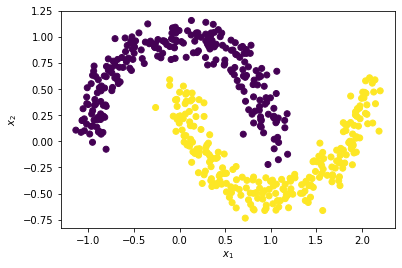

In [4]:
# visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [5]:
# DBSCAN method define & train
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(X)

DBSCAN()

In [8]:
dbscan_cluster1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

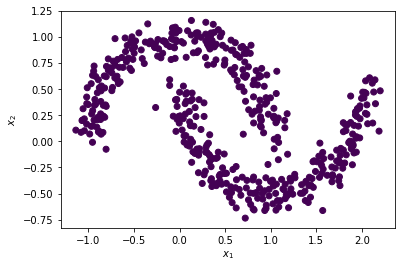

In [6]:
# Visualizing DBSCAN (default setting)
plt.scatter(X[:, 0], 
            X[:, 1], 
            c = dbscan_cluster1.labels_, 
            label = y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [10]:
# Number of Clusters
labels = dbscan_cluster1.labels_
N_clus = len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 1
Estimated no. of noise points: 0
v_measure = 0.0


In [11]:
# Visualizing DBSCAN (parameter tuning)
dbscan_cluster = DBSCAN(eps=0.1, min_samples=8)
dbscan_cluster.fit(X)

DBSCAN(eps=0.1, min_samples=8)

In [13]:
dbscan_cluster.labels_

array([ 0, 12, -1,  0, -1,  7,  7, -1,  1,  4,  0,  2,  3,  3,  0,  3,  0,
        4, -1, -1,  8,  3,  5,  6, 10,  3,  3,  3,  7,  4,  5,  0,  3,  9,
        4,  5, -1, -1,  6,  6,  0,  3,  6,  1, -1,  0,  7,  6,  2,  5,  3,
        4,  3, -1,  8,  9,  2,  2,  8, -1, -1,  5,  7,  6,  5,  0,  3, -1,
        3,  3,  6,  3, -1,  2,  6,  0, -1, -1,  2,  0,  5,  3, -1, -1,  2,
       10,  0, -1, -1,  0,  4, 11,  8, -1,  7,  5,  4,  5,  7, -1, -1,  3,
        6, 10,  0,  3,  1,  6,  6,  3,  6,  3,  7,  6,  4,  3, -1,  5,  3,
        1, 10,  1, 11,  1,  3, -1,  2,  8, 10,  5, -1,  0, -1,  3,  8,  2,
        9,  6,  7,  6,  7,  4,  9, -1, -1,  7,  8, -1,  3,  6, -1,  3,  6,
        2,  1,  0, -1, -1, 11, 11,  3, -1,  2, -1,  0, 11,  3,  3,  3,  6,
       -1,  5, -1, -1,  3,  2, 10,  0,  3,  3,  4, 12,  1,  1, -1,  8, 11,
       -1,  3,  7, -1, -1,  0,  3,  6,  3,  3, -1,  6, -1,  6,  7,  7,  7,
        3,  3,  8,  3,  6,  2,  3, -1,  3, -1,  5,  6, 11, -1,  6,  3,  4,
       -1,  2,  3,  8,  6

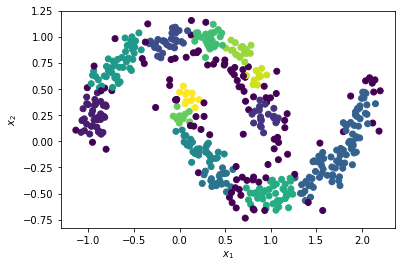

In [14]:
# Visualizing DBSCAN (parameter tugning)
plt.scatter(X[:, 0], 
X[:, 1], 
c = dbscan_cluster.labels_, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [15]:
# Number of Clusters
labels = dbscan_cluster.labels_
N_clus = len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 13
Estimated no. of noise points: 108
v_measure = 0.35448981460791074


## Find the Optimal value of Epsilon

- elbow point detection method to arrive at a suitable value of epsilon

In [16]:
'''
적절한 MinPts 값을 확인하기 위해, 각 점에서의 k-nearest neighbors 계산 가능하며
average k-distance graph를 구성하여 가장 경사도가 높은 지점(elbow point)을 optimal value로 선정함
'''

# package load
from sklearn.neighbors import NearestNeighbors

# k-nearest neighbors define & train
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(df)


Text(0, 0.5, 'Distance')

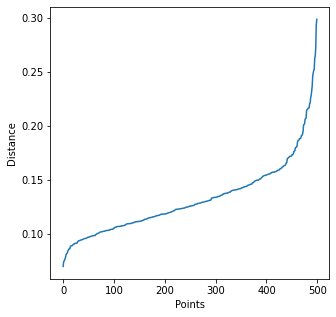

In [17]:
# distance 계산 및 오름차순 정렬
distances, indices = neighbors.kneighbors(df)
distances = np.sort(distances[:,10], axis=0)

# visualize the distances
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

In [18]:
!pip install kneed

In [19]:
# package load
from kneed import KneeLocator

# Knee point location 찾기
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')


In [23]:
print("knee point index: ", knee.knee)

knee point index:  433


distance of knee point 0.1622615011221843


<Figure size 360x360 with 0 Axes>

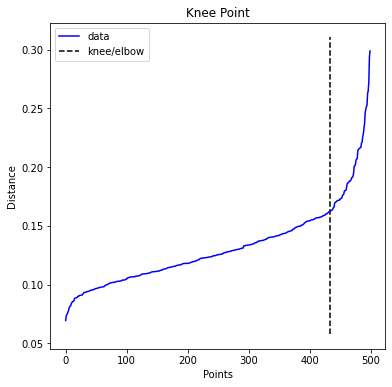

In [26]:
# visualize the knee point
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print("distance of knee point", distances[knee.knee])

## Applying DBSCAN with optimal value of Epsilon (Epsilon = 0.163)

In [27]:
# DBSCAN model define & train
dbscan_cluster = DBSCAN(eps=0.163, min_samples=8)
dbscan_cluster.fit(X)

DBSCAN(eps=0.163, min_samples=8)

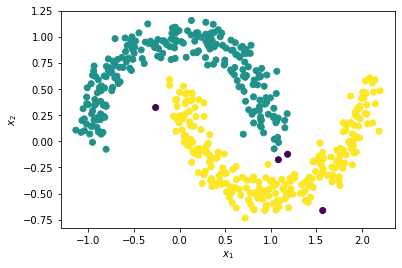

In [28]:
# Visualizing DBSCAN
plt.scatter(X[:, 0], 
X[:, 1], 
c = dbscan_cluster.labels_, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [29]:
# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 2
Estimated no. of noise points: 4
v_measure = 0.9452172923349589
